In [1]:
#train my classifier for digits
import os
from skimage.io import imread
from skimage.color import rgb2grey

digits_images = []
targets = []
for digit in range(9):
    training_directory = 'resources/digits/'+str(digit)+'/'
    for filename in os.listdir(training_directory):
        if (filename.endswith('.png')):
            training_digit = imread(training_directory+filename)
            training_digit = rgb2grey(training_digit)#color to gray
            digits_images.append(training_digit.reshape(128*128))
            targets.append(digit)

In [2]:
digits_images[0].shape

(16384,)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(digits_images, targets, test_size=0.1, random_state=0)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=len(np.unique(Y_train)))
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [5]:
score = knn.score(X_test, Y_test)
print score

0.946448087431694


In [ ]:
knn.predict([X_test[0]])

In [9]:
from sklearn.ensemble import RandomForestClassifier

rc = RandomForestClassifier(n_estimators=9, max_depth=30)
rc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
score = rc.score(X_test, Y_test)
print score

0.9683060109289617


In [16]:
rc.predict([X_test[2]])

array([1])

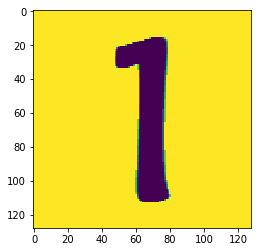

In [18]:
import matplotlib.pyplot as plt

plt.imshow(X_test[2].reshape(128,128))